# Customer Churn Prediction
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. 

However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients.

The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# Step 1: Import necessary libraries
The first step is to import the libraries that will be used throughout the analysis, such as numpy, pandas, matplotlib, and seaborn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/nithyasanthoshini/Desktop/Innomatics/ML Case Studies/Customer Churn Prediction/churn_dataset.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## SPRINT 1 - Exploratory Data Analysis


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Basic information about the DataFrame
print("Number of features (columns):", df.shape)
print("Number of observations (rows):", df.shape[0])

Number of features (columns): (7043, 21)
Number of observations (rows): 7043


In [7]:
print("\nData types of each feature:")
print(df.dtypes)


Data types of each feature:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### The data set includes information about:

#### Customers who left within the last month this column is called Churn

#### Services that each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

#### Customer account information: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

#### Demographic info about customers: gender, age range, and if they have partners and dependents

In [9]:
print(df['SeniorCitizen'].unique())

[0 1]


In [10]:
print(df['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [11]:
print(df['Contract'].unique())

['Month-to-month' 'One year' 'Two year']


In [12]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' '

## Data Cleaning

In [13]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Handling Missing Values

In [14]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

In [16]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

here there are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [17]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [18]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [22]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Data Visualizations

/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


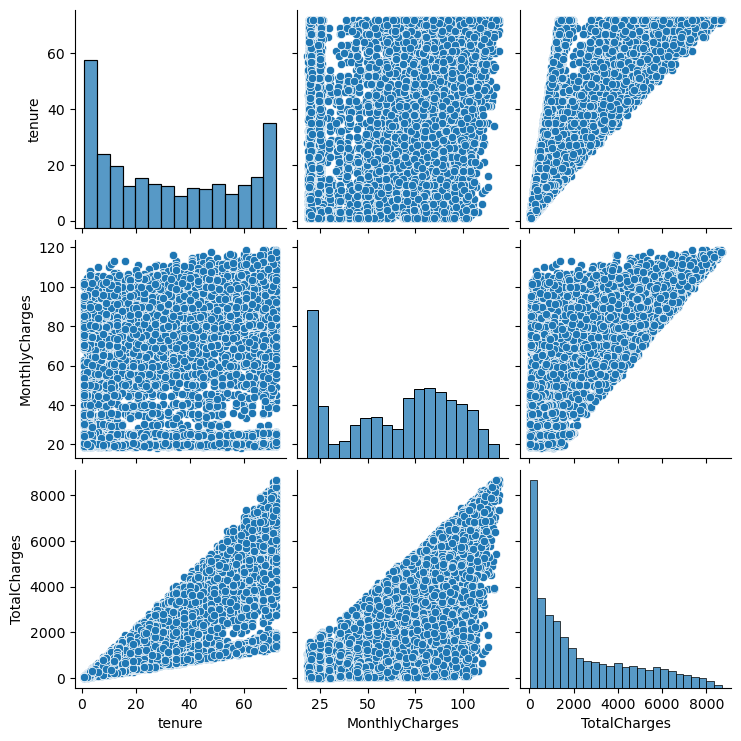

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [25]:
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 6), textcoords='offset points')

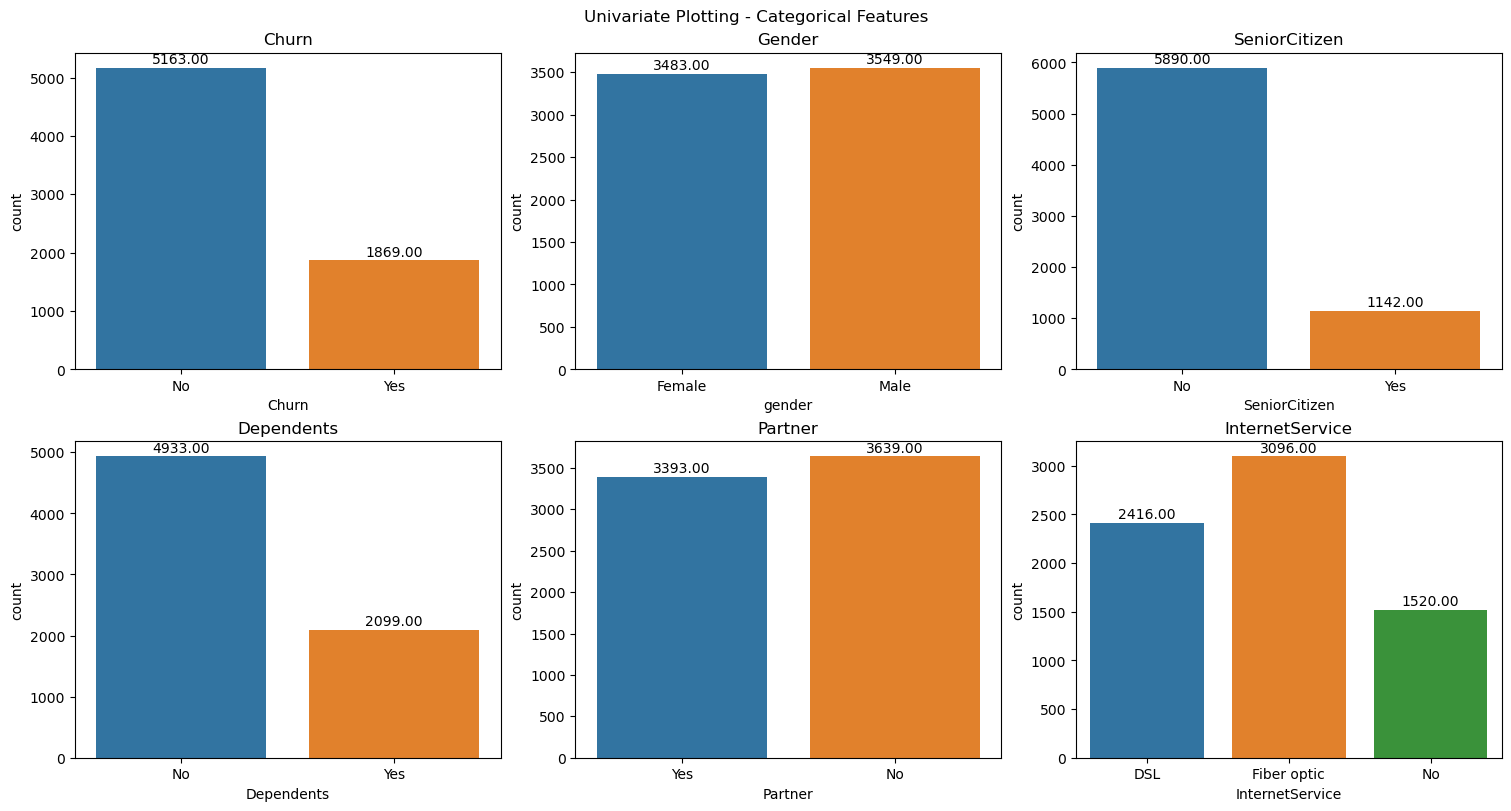

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0, 0].set_title("Churn")
sns.countplot(data=df,x='Churn',ax=axs[0, 0])
annotate_bars(axs[0, 0])

axs[0, 1].set_title("Gender")
sns.countplot(data=df,x='gender',ax=axs[0, 1])
annotate_bars(axs[0, 1])

axs[0, 2].set_title("SeniorCitizen")
sns.countplot(data=df,x='SeniorCitizen',ax=axs[0, 2])
annotate_bars(axs[0, 2])

axs[1, 0].set_title("Dependents")
sns.countplot(data=df,x='Dependents',ax=axs[1, 0])
annotate_bars(axs[1, 0])

axs[1, 1].set_title("Partner")
sns.countplot(data=df,x='Partner',ax=axs[1, 1])
annotate_bars(axs[1, 1])


axs[1, 2].set_title("InternetService")
sns.countplot(data=df,x='InternetService',ax=axs[1, 2])
annotate_bars(axs[1, 2])

Churn: The majority of customers have not churned, with around 5,000 staying and 1,500 leaving.

Gender: The distribution of gender is nearly equal between female and male customers.

SeniorCitizen: Most customers are not senior citizens, with a smaller portion being seniors.

Dependents: A higher number of customers do not have dependents compared to those who do.

Partner: The number of customers without a partner is slightly higher than those with a partner.

InternetService: The majority of customers use Fiber optic internet service (3,096), followed by DSL (2,416), and a smaller portion have no internet service (1,520).

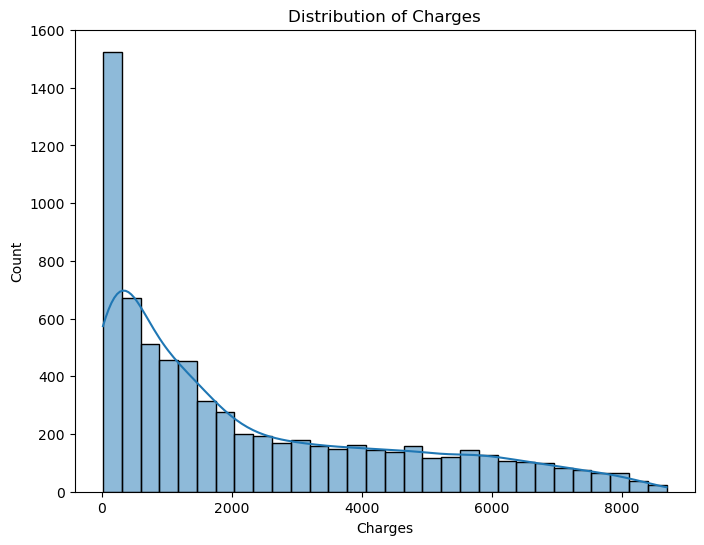

In [27]:
# Distribution of charges
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

In [28]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


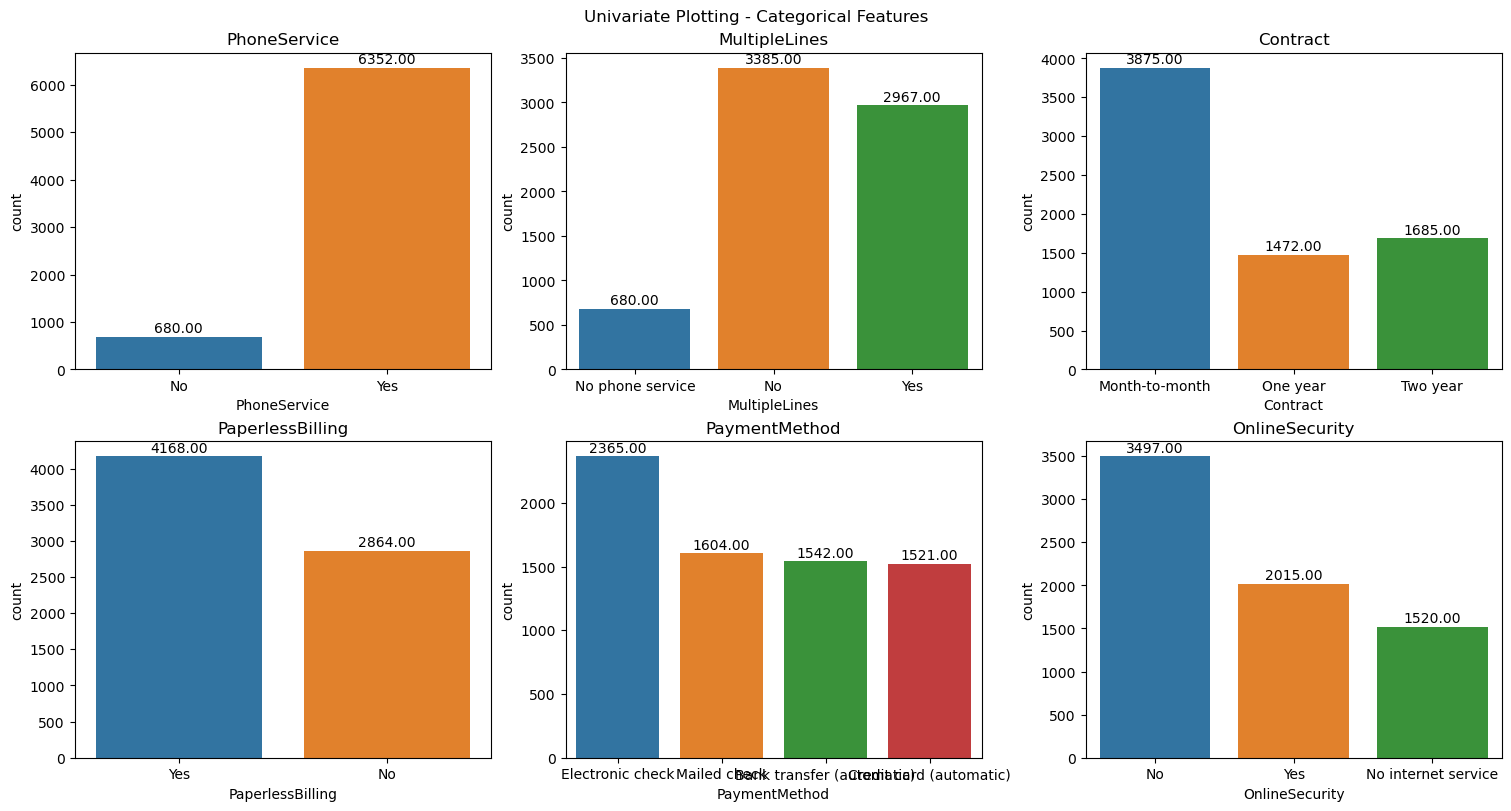

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0, 0].set_title("PhoneService")
sns.countplot(data=df,x='PhoneService',ax=axs[0, 0])
annotate_bars(axs[0, 0])

axs[0, 1].set_title("MultipleLines")
sns.countplot(data=df,x='MultipleLines',ax=axs[0, 1])
annotate_bars(axs[0, 1])

axs[0, 2].set_title("Contract")
sns.countplot(data=df,x='Contract',ax=axs[0, 2])
annotate_bars(axs[0, 2])

axs[1, 0].set_title("PaperlessBilling")
sns.countplot(data=df,x='PaperlessBilling',ax=axs[1, 0])
annotate_bars(axs[1, 0])

axs[1, 1].set_title("PaymentMethod")
sns.countplot(data=df,x='PaymentMethod',ax=axs[1, 1])
annotate_bars(axs[1, 1])


axs[1, 2].set_title("OnlineSecurity")
sns.countplot(data=df,x='OnlineSecurity',ax=axs[1, 2])
annotate_bars(axs[1, 2])

PhoneService: Shows the distribution of customers with and without phone service, with most customers having phone service.

MultipleLines: Depicts the count of customers with no phone service, no multiple lines, and multiple lines, indicating most customers don't have multiple lines.

Contract: Displays the number of customers under different contract types, with a majority on a month-to-month contract.

PaperlessBilling: Illustrates the distribution of customers who have opted for paperless billing versus those who haven't, showing more customers use paperless billing.

PaymentMethod: Represents the count of customers using different payment methods, with electronic checks being the most common method.

OnlineSecurity: Shows the distribution of customers with online security services, indicating most customers do not have online security.

In [30]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


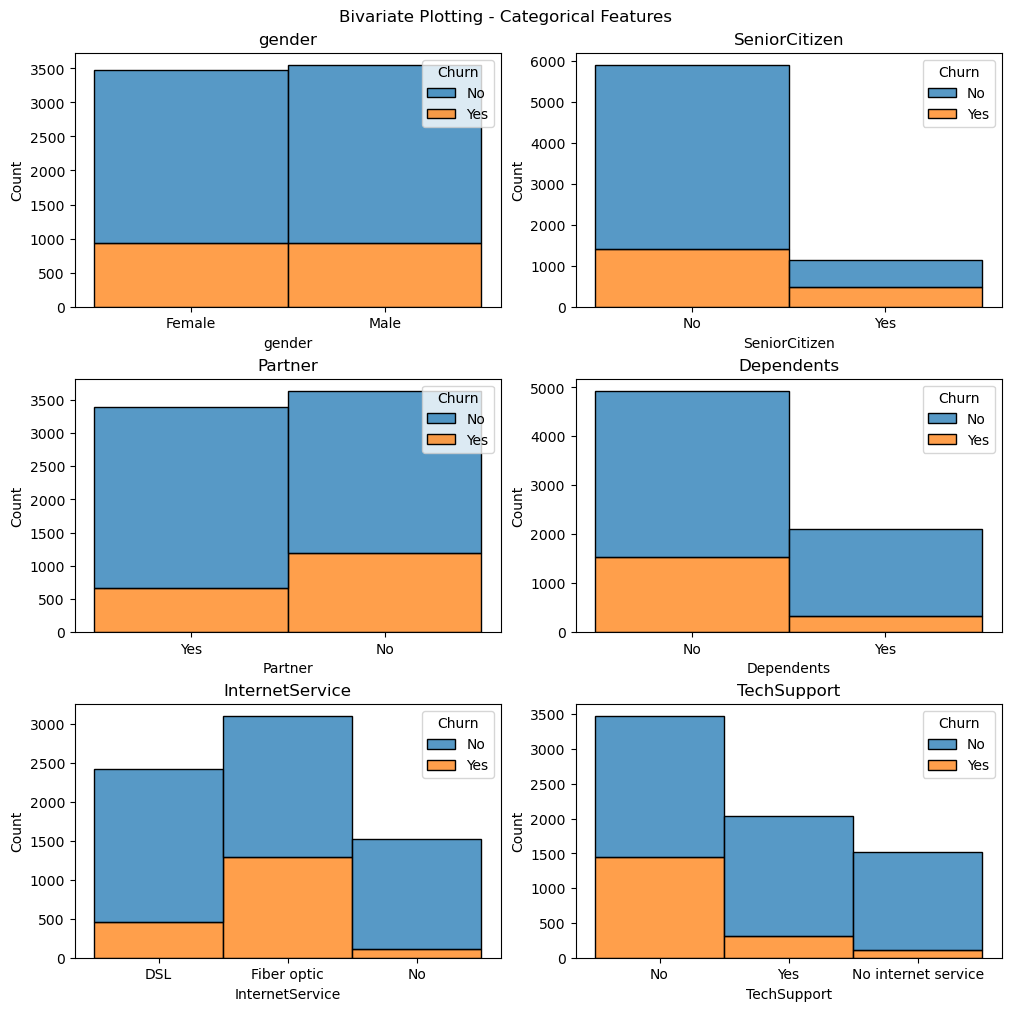

In [31]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Bivariate Plotting - Categorical Features")

# Histogram for gender vs Churn
axs[0, 0].set_title("gender")
sns.histplot(data=df, x='gender', hue='Churn', multiple='stack', ax=axs[0, 0])

# Histogram for SeniorCitizen vs Churn
axs[0, 1].set_title("SeniorCitizen")
sns.histplot(data=df, x='SeniorCitizen', hue='Churn', multiple='stack', ax=axs[0, 1])

# Histogram for Partner vs Churn
axs[1, 0].set_title("Partner")
sns.histplot(data=df, x='Partner', hue='Churn', multiple='stack', ax=axs[1, 0])

# Histogram for Dependents vs Churn
axs[1, 1].set_title("Dependents")
sns.histplot(data=df, x='Dependents', hue='Churn', multiple='stack', ax=axs[1, 1])

# Histogram for InternetService vs Churn
axs[2, 0].set_title("InternetService")
sns.histplot(data=df, x='InternetService', hue='Churn', multiple='stack', ax=axs[2, 0])

# Histogram for TechSupport vs Churn
axs[2, 1].set_title("TechSupport")
sns.histplot(data=df, x='TechSupport', hue='Churn', multiple='stack', ax=axs[2, 1])

plt.show()

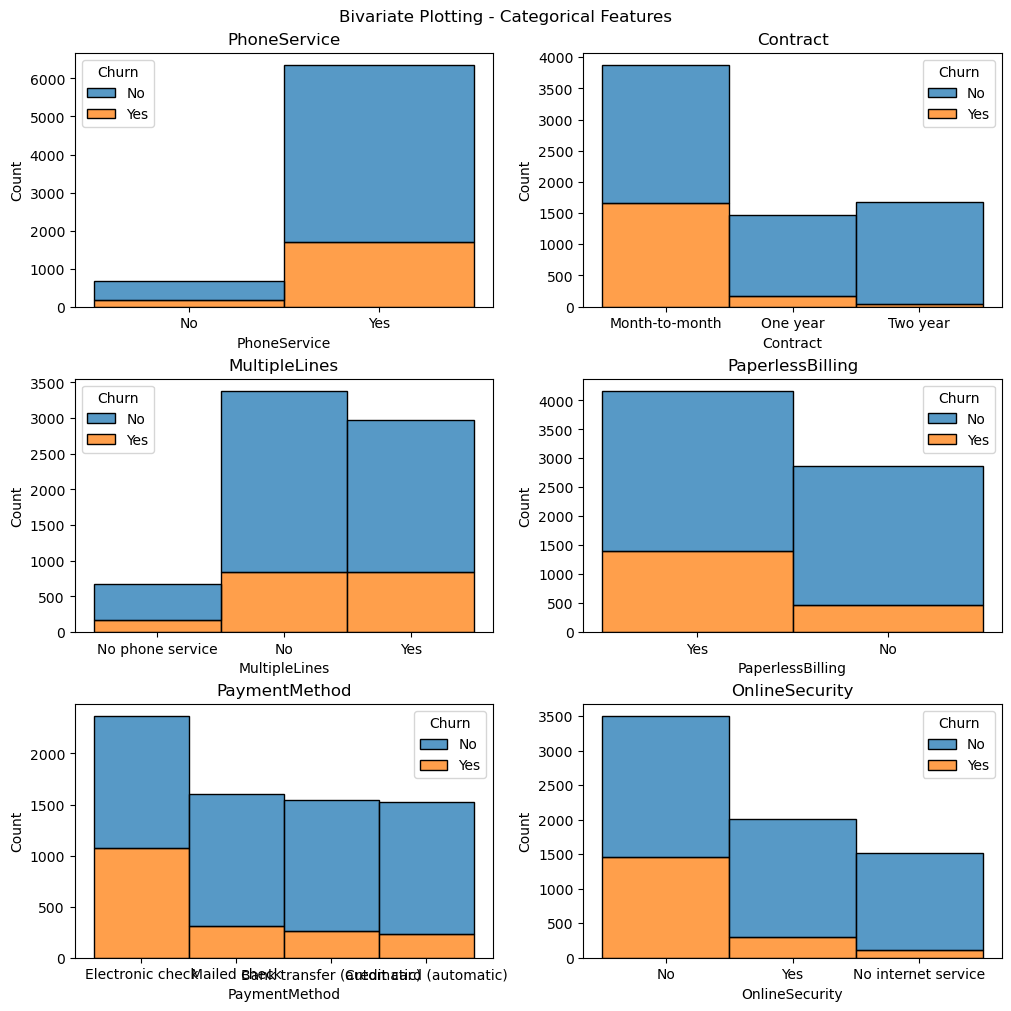

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Bivariate Plotting - Categorical Features")

# Histogram for PhoneService vs Churn
axs[0, 0].set_title("PhoneService")
sns.histplot(data=df, x='PhoneService', hue='Churn', multiple='stack', ax=axs[0, 0])

# Histogram for Contract vs Churn
axs[0, 1].set_title("Contract")
sns.histplot(data=df, x='Contract', hue='Churn', multiple='stack', ax=axs[0, 1])

# Histogram for MultipleLines vs Churn
axs[1, 0].set_title("MultipleLines")
sns.histplot(data=df, x='MultipleLines', hue='Churn', multiple='stack', ax=axs[1, 0])

# Histogram for PaperlessBilling vs Churn
axs[1, 1].set_title("PaperlessBilling")
sns.histplot(data=df, x='PaperlessBilling', hue='Churn', multiple='stack', ax=axs[1, 1])

# Histogram for PaymentMethod vs Churn
axs[2, 0].set_title("PaymentMethod")
sns.histplot(data=df, x='PaymentMethod', hue='Churn', multiple='stack', ax=axs[2, 0])

# Histogram for OnlineSecurity vs Churn
axs[2, 1].set_title("OnlineSecurity")
sns.histplot(data=df, x='OnlineSecurity', hue='Churn', multiple='stack', ax=axs[2, 1])

plt.show()

PhoneService: Histogram showing the distribution of customers with and without phone service, segmented by churn status.

Contract: Histogram displaying the distribution of customers with different contract types, segmented by churn status.

MultipleLines: Histogram illustrating the distribution of customers with no phone service, no multiple lines, and multiple lines, segmented by churn status.

PaperlessBilling: Histogram depicting the distribution of customers who opted for paperless billing versus those who didn't, segmented by churn status.

PaymentMethod: Histogram showing the distribution of customers using different payment methods, segmented by churn status.

OnlineSecurity: Histogram representing the distribution of customers with and without online security services, segmented by churn status.

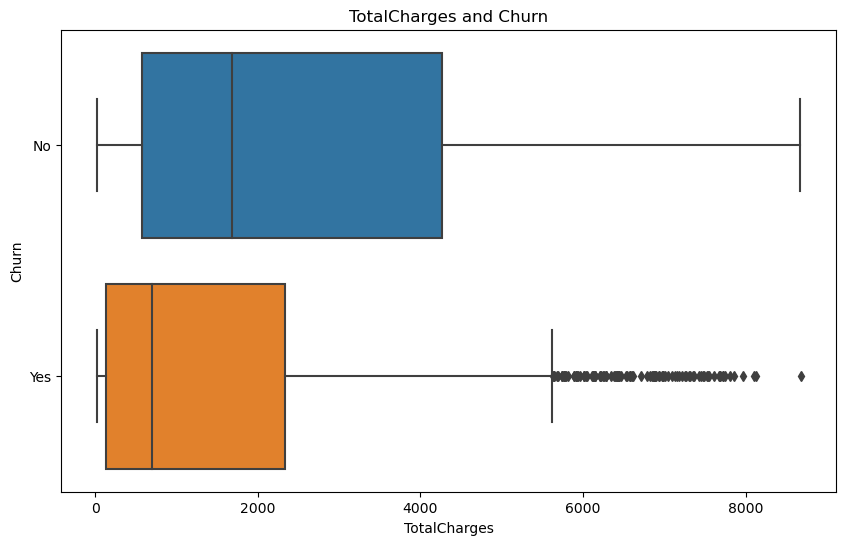

In [33]:
# Boxplot of TotalCharges and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalCharges', y='Churn', data=df)
plt.title('TotalCharges and Churn')
plt.show()

Non-Churned Customers (No): The distribution of total charges for customers who did not churn.

The median TotalCharges for non-churned customers is higher.
The interquartile range (IQR) and whiskers show a wider spread of TotalCharges for non-churned customers, with some outliers reaching very high total charges.

Churned Customers (Yes): The distribution of total charges for customers who churned.

The median TotalCharges for churned customers is lower.
The IQR is narrower, indicating that most churned customers had lower total charges.
There are fewer outliers, indicating that fewer churned customers had very high total charges compared to non-churned customers.

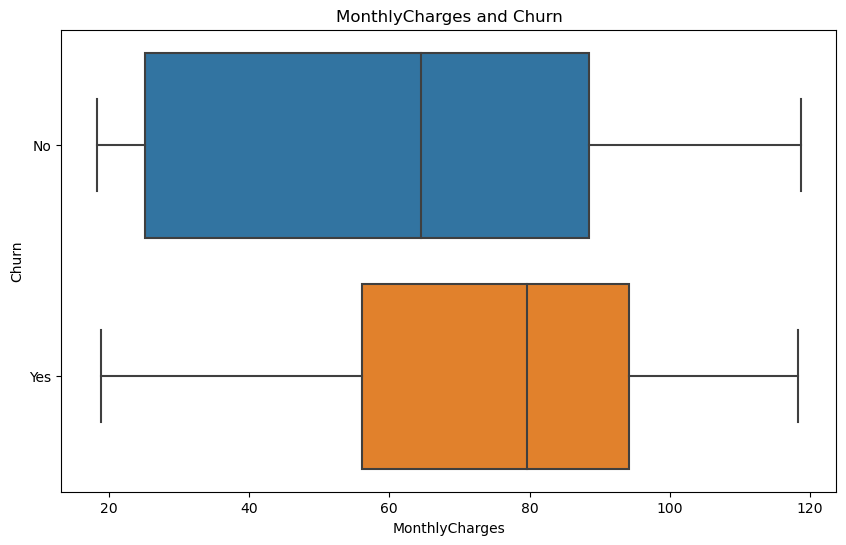

In [34]:
# Boxplot of MonthlyCharges and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='MonthlyCharges', y='Churn', data=df)
plt.title('MonthlyCharges and Churn')
plt.show()

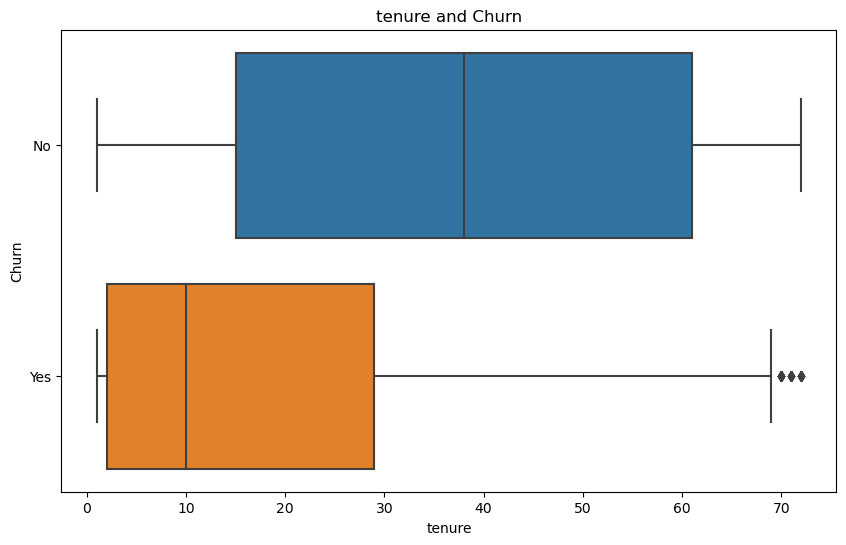

In [35]:
# Boxplot of tenure and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure', y='Churn', data=df)
plt.title('tenure and Churn')
plt.show()

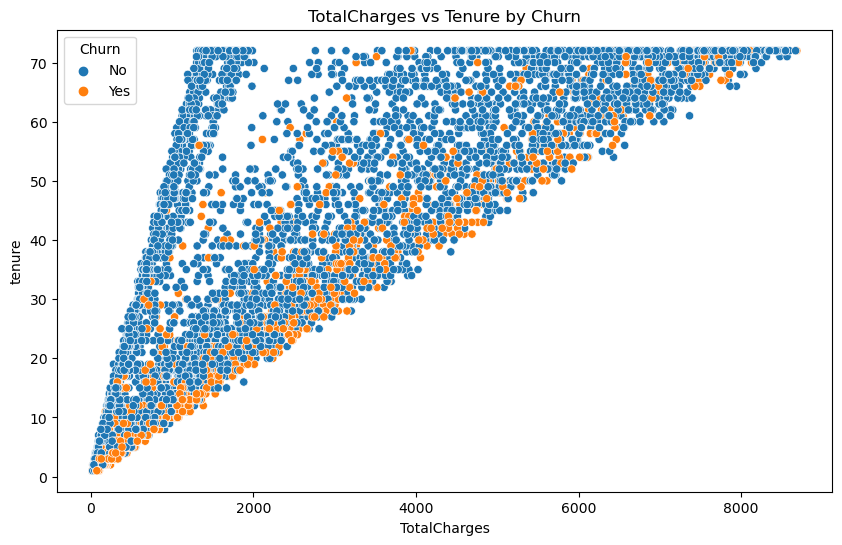

In [36]:
# Scatter plot for numerical columns (e.g., 'TotalCharges' vs. 'tenure')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df)
plt.title('TotalCharges vs Tenure by Churn')
plt.show()

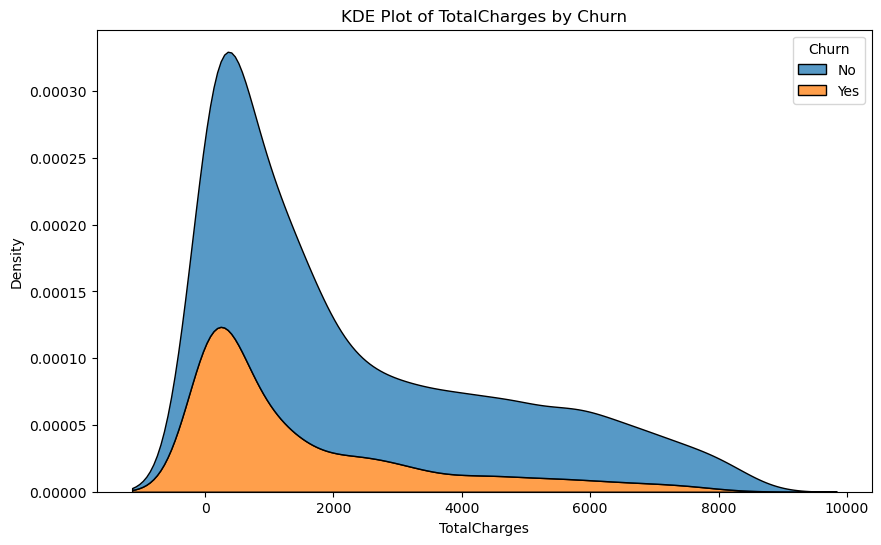

In [37]:
# KDE plot for 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', multiple='stack')
plt.title('KDE Plot of TotalCharges by Churn')
plt.show()

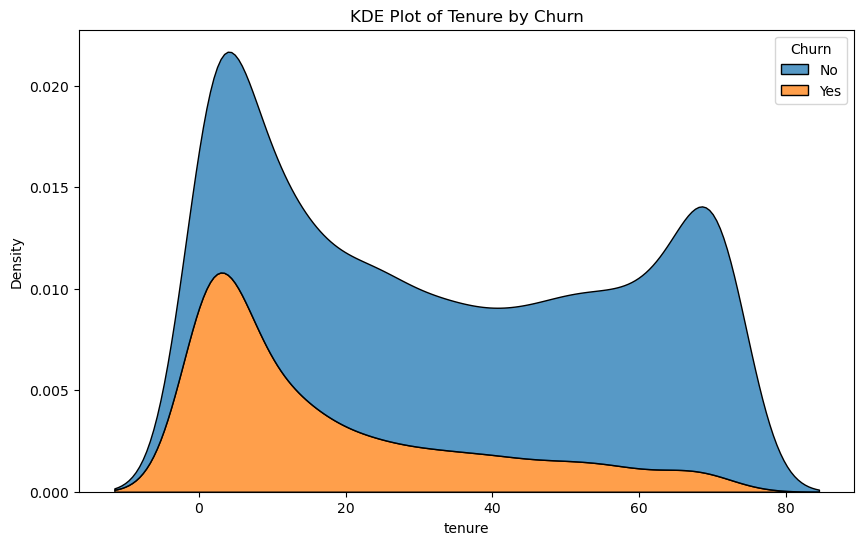

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('KDE Plot of Tenure by Churn')
plt.show()

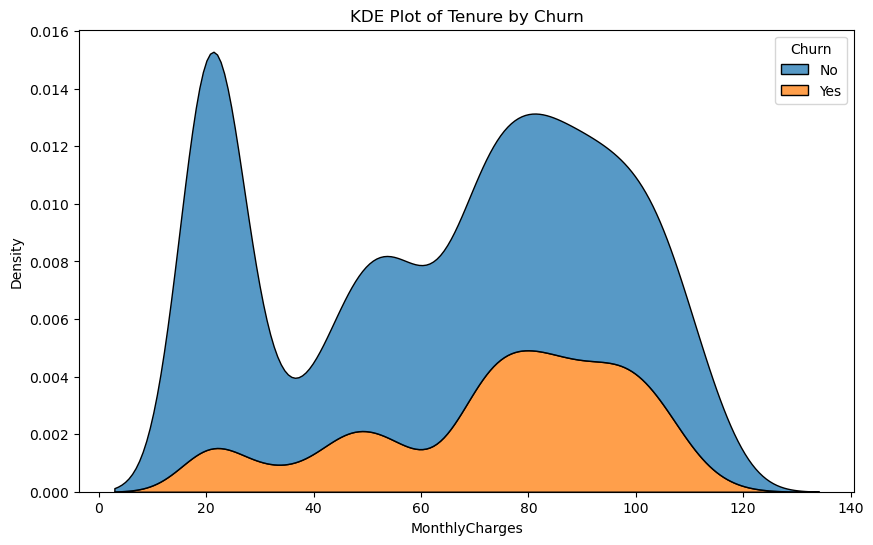

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.title('KDE Plot of Tenure by Churn')
plt.show()

In [40]:
## Featture Engineering

In [41]:
df['MonthlyCharges_per_Tenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)

In [43]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_per_Tenure
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,14.925000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1.627143
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,17.950000
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.919565
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,23.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,3.392000
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1.413699
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,2.466667
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,14.880000


In [45]:
df['TotalServices'] = (df[['PhoneService', 'MultipleLines', 'InternetService', 
                           'OnlineSecurity', 'OnlineBackup','TechSupport', 'StreamingTV', 
                           'StreamingMovies']].sum(axis=1) > 0).astype(int)

TypeError: '>' not supported between instances of 'str' and 'int'

In [47]:
df['TotalServices'] = (df[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 
                           'StreamingMovies']].apply(pd.to_numeric, errors='coerce').sum(axis=1))

# Include InternetService columns
#df['TotalServices'] += (df[['InternetService_Fiber optic', 'InternetService_DSL']].apply(pd.to_numeric, errors='coerce').sum(axis=1) > 0).astype(int)


In [48]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_per_Tenure,TotalServices
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,14.925000,0.0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1.627143,0.0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,17.950000,0.0
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.919565,0.0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,23.566667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,3.392000,0.0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1.413699,0.0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,2.466667,0.0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,14.880000,0.0


In [53]:
print(df['TotalServices'].unique())

[0.]


## SPRINT 2 - Data Preparation and Model Building

## Machine Learning
#### 1.Identify the input and output/target variables.
Input variables: age, sex, bmi, children, smoker, region

Output/target variable: charges

#### 2.Identify the type of ML Task.
This is a regression task since we are predicting a continuous variable (medical costs).

#### 3.Identify the Evaluation Metric.
For this regression task, we will use Mean Absolute Error (MAE) as the evaluation metric.

## Step 2.1: Split the dataset into Training and Testing

In [40]:
from sklearn.model_selection import train_test_split

# Define input and output variables
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the dataset into training and testing sets (75:25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [41]:
X_train.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [42]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3166,Male,No,Yes,No,14,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),48.80,664.40
4333,Male,No,Yes,No,31,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),90.55,2929.75
1927,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.35,5118.95
2315,Male,No,Yes,Yes,35,Yes,Yes,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),73.45,2661.10
858,Female,No,Yes,No,66,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,One year,No,Electronic check,89.00,5898.60


In [43]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['float64','int64'])

In [44]:
 X_train_cat.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3166,Male,No,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic)
4333,Male,No,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic)
1927,Male,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
2315,Male,No,Yes,Yes,Yes,Yes,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic)
858,Female,No,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,One year,No,Electronic check


In [45]:
 X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
3166,14,48.80,664.40
4333,31,90.55,2929.75
1927,47,107.35,5118.95
2315,35,73.45,2661.10
858,66,89.00,5898.60


## Step 2.2: Data Preprocessing for Model Building

### Data preparation on train data
For numerical variables, we will use StandardScaler for standardization. For categorical variables, we will use OneHotEncoder.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = scaler.get_feature_names_out(),
                                   index = X_train_num.index)

X_train_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
3166,-0.748175,-0.526380,-0.712154
4333,-0.056016,0.858262,0.290305
1927,0.595428,1.415436,1.259067
2315,0.106845,0.291139,0.171422
858,1.369017,0.806856,1.604076


In [47]:
X_train_num_transformed.describe()

,tenure,MonthlyCharges,TotalCharges
count,5.274000e+03,5.274000e+03,5.274000e+03
mean,-9.498154e-17,-4.930956e-16,-2.425061e-17
std,1.000095e+00,1.000095e+00,1.000095e+00
min,-1.277474e+00,-1.539573e+00,-9.978222e-01
25%,-9.517516e-01,-9.786688e-01,-8.291231e-01
50%,-1.374468e-01,1.883276e-01,-3.924126e-01
75%,9.211495e-01,8.362904e-01,6.620981e-01
max,1.613309e+00,1.788543e+00,2.837022e+00


### LabelEncoding On Train data

In [48]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [49]:
X_train_cat_transformed = X_train_cat.apply(lambda x: object_to_int(x))
X_train_cat_transformed

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3166,1,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0
4333,1,0,1,0,1,2,1,2,2,0,2,0,0,0,1,1
1927,1,0,1,1,1,2,1,0,0,2,2,2,2,0,1,0
2315,1,0,1,1,1,2,0,0,0,0,2,2,2,1,1,0
858,0,0,1,0,1,2,1,2,2,0,2,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0
5199,0,0,0,0,1,2,1,0,2,2,2,2,2,1,1,2
5235,1,0,0,0,1,2,1,2,0,0,0,0,0,0,1,2
5399,0,0,0,0,1,0,2,1,1,1,1,1,1,1,0,0


## Concatenating both transformed numerical and categorical columns in Train data

In [50]:
X_train_transformed = pd.concat([X_train_cat_transformed,X_train_num_transformed],axis=1)

X_train_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
3166,1,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,-0.748175,-0.526380,-0.712154
4333,1,0,1,0,1,2,1,2,2,0,2,0,0,0,1,1,-0.056016,0.858262,0.290305
1927,1,0,1,1,1,2,1,0,0,2,2,2,2,0,1,0,0.595428,1.415436,1.259067
2315,1,0,1,1,1,2,0,0,0,0,2,2,2,1,1,0,0.106845,0.291139,0.171422
858,0,0,1,0,1,2,1,2,2,0,2,0,0,1,0,2,1.369017,0.806856,1.604076


In [51]:
X_train_transformed.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
tenure              False
MonthlyCharges      False
TotalCharges        False
dtype: bool

<Axes: >

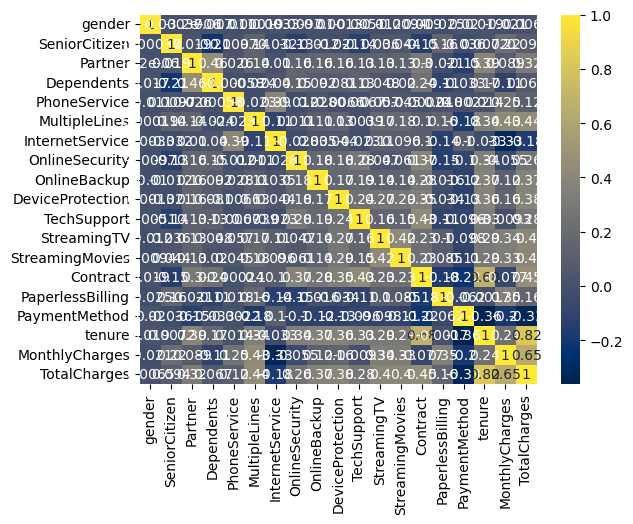

In [52]:
corr = X_train_transformed.corr()
sns.heatmap(corr,annot=True,cmap='cividis')

## Data preparation on test data
We will transform the test data using the same process.

In [53]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [54]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
2481,1.165441,-1.315709,-0.341611
6784,-0.544599,-1.325659,-0.800016
6125,-0.788891,1.246294,-0.404781
3052,0.188275,-0.319098,-0.107519
4099,-1.073897,-1.168124,-0.934719


### LabelEncoding On Test Data

In [55]:
X_test_cat_transformed = X_test_cat.apply(lambda x: object_to_int(x))
X_test_cat_transformed

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2481,1,1,1,0,1,2,2,1,1,1,1,1,1,2,0,0
6784,0,0,0,0,1,2,2,1,1,1,1,1,1,0,0,0
6125,1,0,1,0,1,2,1,0,0,2,0,2,2,0,1,1
3052,1,0,1,0,1,2,0,2,0,0,0,0,0,0,1,3
4099,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,1,0,0,0,1,0,2,1,1,1,1,1,1,0,0,1
6187,1,0,1,1,1,0,2,1,1,1,1,1,1,2,0,3
110,1,0,1,0,1,2,1,2,2,0,0,2,0,0,1,2
3048,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2


## Concatenating both transformed numerical and categorical columns in Test data

In [56]:
X_test_transformed = pd.concat([X_test_cat_transformed,X_test_num_transformed],axis=1)

X_test_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
2481,1,1,1,0,1,2,2,1,1,1,1,1,1,2,0,0,1.165441,-1.315709,-0.341611
6784,0,0,0,0,1,2,2,1,1,1,1,1,1,0,0,0,-0.544599,-1.325659,-0.800016
6125,1,0,1,0,1,2,1,0,0,2,0,2,2,0,1,1,-0.788891,1.246294,-0.404781
3052,1,0,1,0,1,2,0,2,0,0,0,0,0,0,1,3,0.188275,-0.319098,-0.107519
4099,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,-1.073897,-1.168124,-0.934719


## Step - 6: Model Training Phase and 
## Step - 7: Predict and evaluate each model separately using the correct evaluation metric. 

## KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a KNN classifier
KNN = KNeighborsClassifier(n_neighbors = 11)

# Fit the classifier on the training data
KNN.fit(X_train_transformed, y_train)

# Predict on the test data
y_test_pred = KNN.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
KNN_accuracy = accuracy
print("KNN accuracy:", accuracy)

KNN accuracy: 0.7696245733788396


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [58]:
X_test_transformed = np.ascontiguousarray(X_test_transformed)

In [60]:
# Create a DataFrame to show actual vs predicted values
output_df = pd.DataFrame({'Actual': y_test})
output_df['KNN Classification Prediction'] = y_test_pred

print(output_df)

     Actual KNN Classification Prediction
2481     No                            No
6784     No                            No
6125    Yes                           Yes
3052     No                            No
4099     No                            No
...     ...                           ...
6103     No                            No
6187     No                            No
110     Yes                            No
3048     No                           Yes
6446     No                            No

[1758 rows x 2 columns]


In [61]:
# X_test_transformed = np.ascontiguousarray(X_test_transformed)
output_df

,Actual,KNN Classification Prediction
2481,No,No
6784,No,No
6125,Yes,Yes
3052,No,No
4099,No,No
...,...,...
6103,No,No
6187,No,No
110,Yes,No
3048,No,Yes


In [62]:
KNN_pred= KNN.predict(X_test_transformed)
report = classification_report(y_test,KNN_pred)
print(report)

              precision    recall  f1-score   support

          No       0.84      0.85      0.85      1300
         Yes       0.56      0.53      0.54       458

    accuracy                           0.77      1758
   macro avg       0.70      0.69      0.70      1758
weighted avg       0.77      0.77      0.77      1758



/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


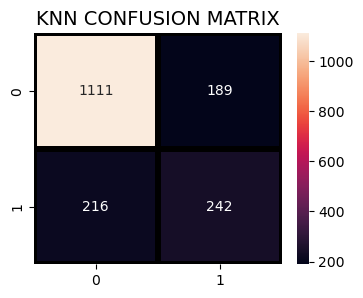

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, KNN_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CONFUSION MATRIX",fontsize=14)
plt.show()

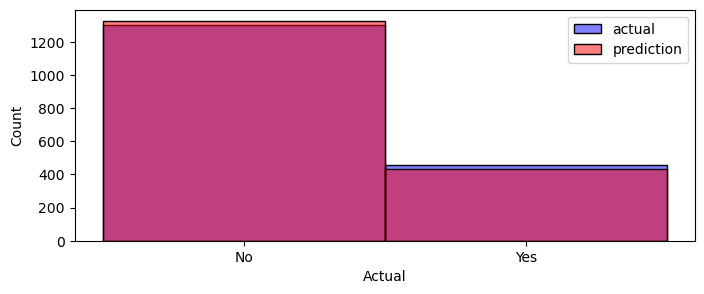

In [64]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['KNN Classification Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr_model = LogisticRegression()

# Fit the classifier on the training data
lr_model.fit(X_train_transformed, y_train)

# Predict on the test data
y_test_pred = lr_model.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
LogisticRegression_accuracy = accuracy
print("Logistic Regression accuracy:", accuracy)

Logistic Regression accuracy: 0.7895335608646189


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
output_df['Logistic Regression Prediction'] = y_test_pred

output_df

,Actual,KNN Classification Prediction,Logistic Regression Prediction
2481,No,No,No
6784,No,No,No
6125,Yes,Yes,Yes
3052,No,No,No
4099,No,No,No
...,...,...,...
6103,No,No,No
6187,No,No,No
110,Yes,No,No
3048,No,Yes,No


In [67]:
lr_pred= lr_model.predict(X_test_transformed)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1300
         Yes       0.62      0.50      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


output_df

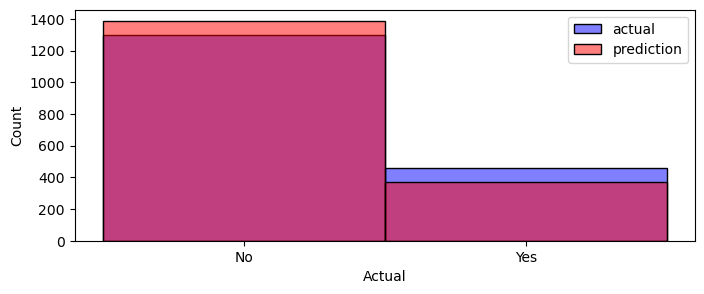

In [68]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['Logistic Regression Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

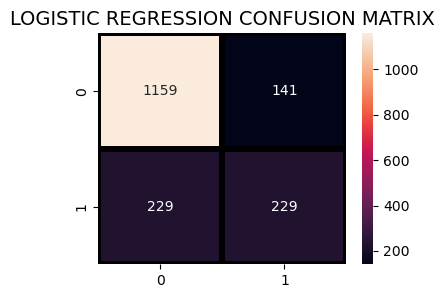

In [69]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


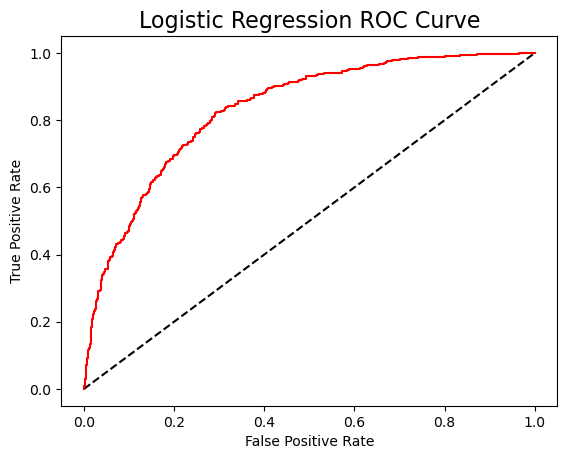

In [70]:
from sklearn.metrics import roc_curve

y_test_binary = y_test.map({'No': 0, 'Yes': 1})

y_pred_prob = lr_model.predict_proba(X_test_transformed)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### Support Vector Machine

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train_transformed, y_train)
# Predict on the test data
y_test_pred = svc.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
SVM_accuracy = accuracy
print("Support Vector Machine accuracy:", accuracy)

Support Vector Machine accuracy: 0.7923777019340159


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [73]:
output_df['Support Vector Machine Prediction'] = y_test_pred

output_df

,Actual,KNN Classification Prediction,Logistic Regression Prediction,Support Vector Machine Prediction
2481,No,No,No,No
6784,No,No,No,No
6125,Yes,Yes,Yes,Yes
3052,No,No,No,No
4099,No,No,No,No
...,...,...,...,...
6103,No,No,No,No
6187,No,No,No,No
110,Yes,No,No,No
3048,No,Yes,No,No


In [74]:
svc_pred= svc.predict(X_test_transformed)
report = classification_report(y_test,svc_pred)
print(report)

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1300
         Yes       0.62      0.52      0.57       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.72      1758
weighted avg       0.78      0.79      0.79      1758



/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


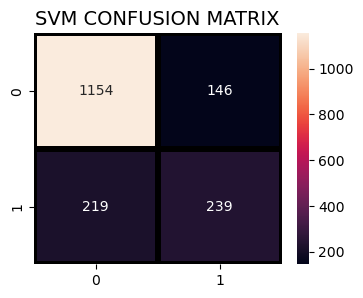

In [75]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM CONFUSION MATRIX",fontsize=14)
plt.show()

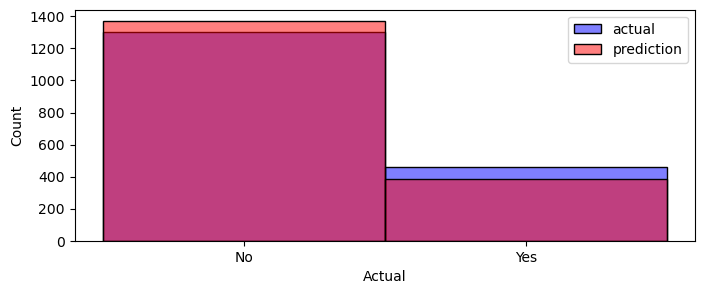

In [76]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['Support Vector Machine Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

## RandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train_transformed, y_train)
# Predict on the test data
y_test_pred = RFC.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
RandomForestClassifier_accuracy = accuracy
print("RandomForestClassifier accuracy:", accuracy)

RandomForestClassifier accuracy: 0.7844141069397043


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [78]:
output_df['RandomForestClassifier Prediction'] = y_test_pred

output_df

,Actual,KNN Classification Prediction,Logistic Regression Prediction,Support Vector Machine Prediction,RandomForestClassifier Prediction
2481,No,No,No,No,No
6784,No,No,No,No,No
6125,Yes,Yes,Yes,Yes,Yes
3052,No,No,No,No,No
4099,No,No,No,No,No
...,...,...,...,...,...
6103,No,No,No,No,No
6187,No,No,No,No,No
110,Yes,No,No,No,No
3048,No,Yes,No,No,Yes


In [79]:
RFC_pred= RFC.predict(X_test_transformed)
report = classification_report(y_test,RFC_pred)
print(report)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1300
         Yes       0.62      0.45      0.52       458

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


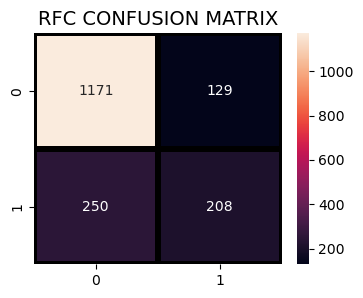

In [80]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, RFC_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RFC CONFUSION MATRIX",fontsize=14)
plt.show()

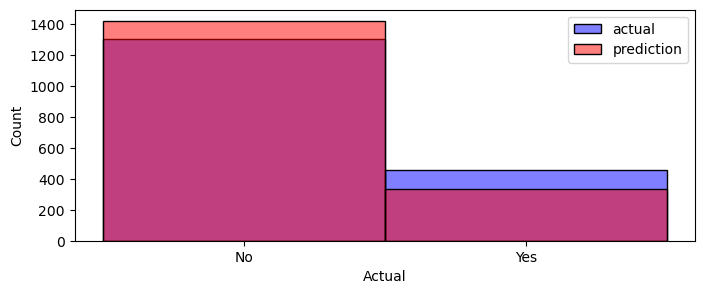

In [81]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['RandomForestClassifier Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

## Desicion Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train_transformed, y_train)
# Predict on the test data
y_test_pred = DTC.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
DecisionTree_accuracy = accuracy
print("DecisionTree accuracy:", accuracy)

DecisionTree accuracy: 0.7184300341296929


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [83]:
output_df['DecisionTree Prediction'] = y_test_pred

output_df

,Actual,KNN Classification Prediction,Logistic Regression Prediction,Support Vector Machine Prediction,RandomForestClassifier Prediction,DecisionTree Prediction
2481,No,No,No,No,No,No
6784,No,No,No,No,No,Yes
6125,Yes,Yes,Yes,Yes,Yes,Yes
3052,No,No,No,No,No,No
4099,No,No,No,No,No,No
...,...,...,...,...,...,...
6103,No,No,No,No,No,No
6187,No,No,No,No,No,No
110,Yes,No,No,No,No,Yes
3048,No,Yes,No,No,Yes,Yes


In [84]:
DTC_pred= DTC.predict(X_test_transformed)
report = classification_report(y_test,DTC_pred)
print(report)

              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1300
         Yes       0.46      0.50      0.48       458

    accuracy                           0.72      1758
   macro avg       0.64      0.65      0.64      1758
weighted avg       0.73      0.72      0.72      1758



/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


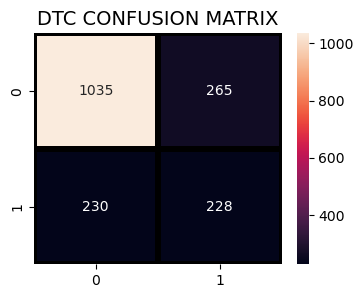

In [85]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, DTC_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DTC CONFUSION MATRIX",fontsize=14)
plt.show()

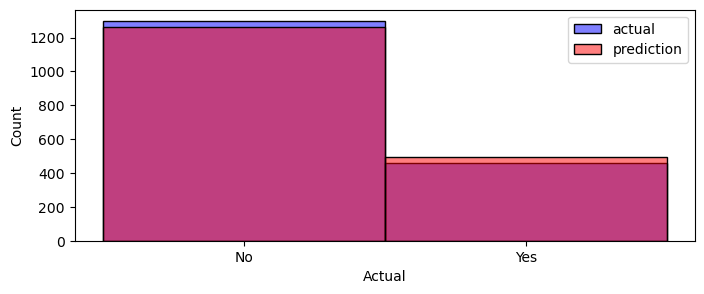

In [86]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['DecisionTree Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

In [87]:
accuracies = {
    'KNN':KNN_accuracy,
    'Logistic Regression': LogisticRegression_accuracy,
    'SVM': SVM_accuracy,
    'Random Forest': RandomForestClassifier_accuracy,
    'Decision Tree': DecisionTree_accuracy
}

# Convert the dictionary to a DataFrame for easy plotting with Seaborn
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df

,Model,Accuracy
0,KNN,0.769625
1,Logistic Regression,0.789534
2,SVM,0.792378
3,Random Forest,0.784414
4,Decision Tree,0.718430


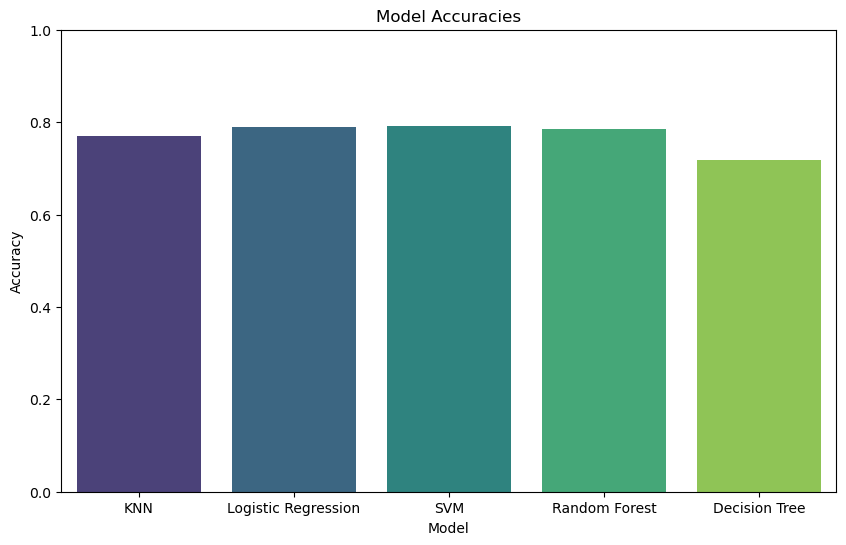

In [88]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

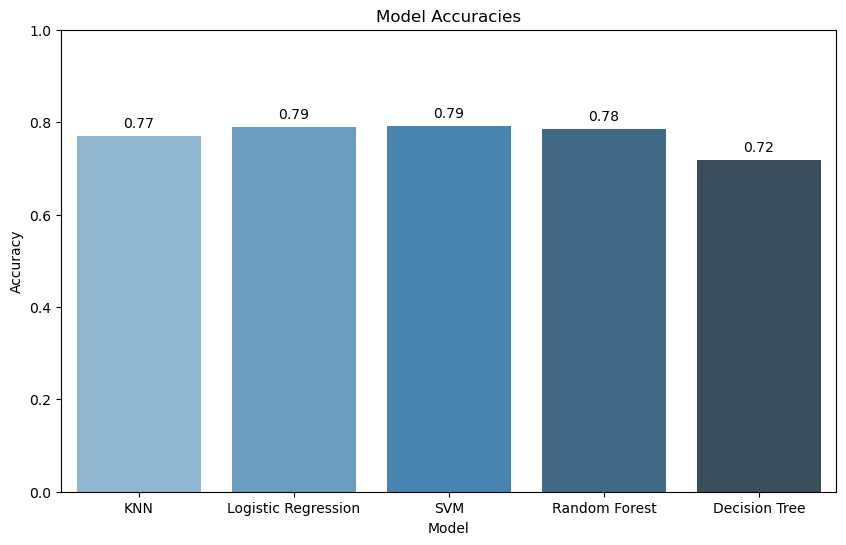

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming accuracy_df is your dataframe with 'Model' and 'Accuracy' columns
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Blues_d')

# Adding title and labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Adding text on each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),  # Points offset for the text
                      textcoords = 'offset points')

plt.show()


## Ensemble Methods

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_transformed, y_train)
gb_pred = gb.predict(X_test_transformed)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7901023890784983


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [91]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier()
a_model.fit(X_train_transformed,y_train)
a_preds = a_model.predict(X_test_transformed)
print("AdaBoost Classifier accuracy",accuracy_score(y_test, a_preds))

AdaBoost Classifier accuracy 0.7918088737201365


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [92]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train_transformed, y_train)
predictions = eclf1.predict(X_test_transformed)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7974971558589306


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


## Hyperparameter Tuning and K-Fold Validation

In [93]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [118]:
grid_search.fit(X_train_transformed, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [113]:
best_rfc = grid_search.best_estimator_

# Predict on the test data with the best model
y_test_pred = best_rfc.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
GridSearchCV_accuracy = accuracy
print("RandomForestClassifier best parameters:", grid_search.best_params_)
print("RandomForestClassifier best cross-validation score:", grid_search.best_score_)
print("RandomForestClassifier accuracy on test set:", accuracy)

RandomForestClassifier best parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier best cross-validation score: 0.8073588316231554
RandomForestClassifier accuracy on test set: 0.7963594994311718


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [98]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1300
         Yes       0.65      0.48      0.55       458

    accuracy                           0.80      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.80      0.79      1758



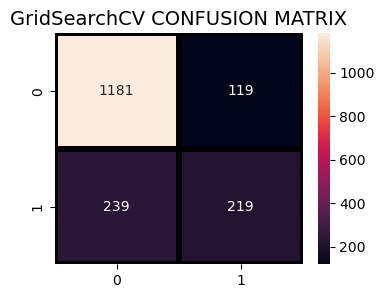

In [99]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("GridSearchCV CONFUSION MATRIX",fontsize=14)
plt.show()

In [100]:
output_df['GridSearchCV Prediction'] = y_test_pred

output_df

,Actual,KNN Classification Prediction,Logistic Regression Prediction,Support Vector Machine Prediction,RandomForestClassifier Prediction,DecisionTree Prediction,GridSearchCV Prediction
2481,No,No,No,No,No,No,No
6784,No,No,No,No,No,Yes,No
6125,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3052,No,No,No,No,No,No,No
4099,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...
6103,No,No,No,No,No,No,No
6187,No,No,No,No,No,No,No
110,Yes,No,No,No,No,Yes,No
3048,No,Yes,No,No,Yes,Yes,Yes


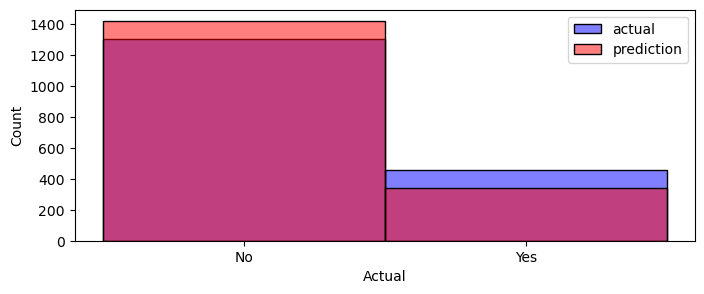

In [101]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['GridSearchCV Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [103]:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}

In [104]:
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [116]:
random_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42, verbose=2)

In [117]:
#Get the best parameters and evaluate the best model
best_rfc = random_search.best_estimator_

# Predict on the test data with the best model
y_test_pred = best_rfc.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
RandomizedSearchCV_accuracy = accuracy
print("RandomForestClassifier best parameters:", random_search.best_params_)
print("RandomForestClassifier best cross-validation score:", random_search.best_score_)
print("RandomForestClassifier accuracy on test set:", accuracy)

RandomForestClassifier best parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 50, 'bootstrap': True}
RandomForestClassifier best cross-validation score: 0.805652850346682
RandomForestClassifier accuracy on test set: 0.7974971558589306


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [107]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1300
         Yes       0.65      0.48      0.55       458

    accuracy                           0.80      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.79      0.80      0.79      1758



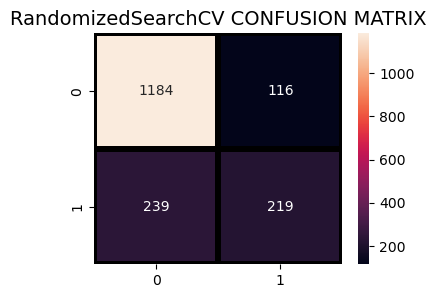

In [108]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomizedSearchCV CONFUSION MATRIX",fontsize=14)
plt.show()

In [109]:
output_df['RandomizedSearchCV Prediction'] = y_test_pred

output_df

,Actual,KNN Classification Prediction,Logistic Regression Prediction,Support Vector Machine Prediction,RandomForestClassifier Prediction,DecisionTree Prediction,GridSearchCV Prediction,RandomizedSearchCV Prediction
2481,No,No,No,No,No,No,No,No
6784,No,No,No,No,No,Yes,No,No
6125,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3052,No,No,No,No,No,No,No,No
4099,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
6103,No,No,No,No,No,No,No,No
6187,No,No,No,No,No,No,No,No
110,Yes,No,No,No,No,Yes,No,No
3048,No,Yes,No,No,Yes,Yes,Yes,Yes


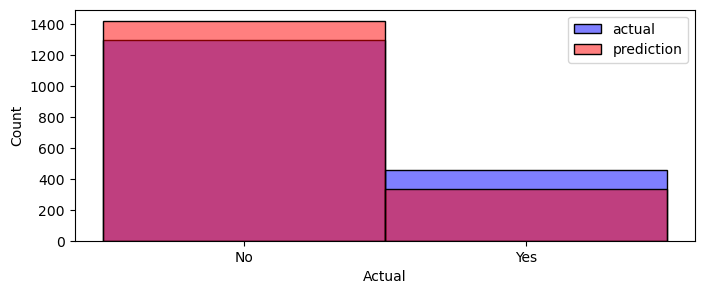

In [110]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['RandomizedSearchCV Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

In [114]:
accuracies = {
    'KNN':KNN_accuracy,
    'Logistic Regression': LogisticRegression_accuracy,
    'SVM': SVM_accuracy,
    'Random Forest': RandomForestClassifier_accuracy,
    'Decision Tree': DecisionTree_accuracy,
    'RandomizedSearchCV': RandomizedSearchCV_accuracy,
    'GridSearchCV' : GridSearchCV_accuracy
}

# Convert the dictionary to a DataFrame for easy plotting with Seaborn
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df

,Model,Accuracy
0,KNN,0.769625
1,Logistic Regression,0.789534
2,SVM,0.792378
3,Random Forest,0.796359
4,Decision Tree,0.718430
5,RandomizedSearchCV,0.798066
6,GridSearchCV,0.796359


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_sam

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samp

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_sa

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_sample